### 1. in 2. naloga
##### Branje podatkovne datoteke
Podatkovno datoteko lahko uvozimo in preberemo s pomočjo knjižnice pandas. Za to uporabimo funkcijo read_excel.
Prvih pet vrstic lahko prikažemo s pomočjo funkcije head().

In [1]:
import pandas as pd

df = pd.read_excel('podatki_python_akademija.xlsx');
print(df.head());
print(df.dtypes);

     ID  DAN  LETO  DAN_V_TEDNU  TEDEN  DAN_V_MESECU      DATUM  PRA_DAN  \
0  4394    7  2012            6      1             7 2012-01-07        0   
1  4395    8  2012            7      1             8 2012-01-08        0   
2  4396    9  2012            1      2             9 2012-01-09        0   
3  4397   10  2012            2      2            10 2012-01-10        0   
4  4398   11  2012            3      2            11 2012-01-11        0   

   PRA_PRED  PRA_NASL  ...  MIN_PRET_TED  MAX_PRET_TED  TEMP_MIN  TEMP_MAX  \
0         0         0  ...   768580.1900   1356135.171     -3.54      6.96   
1         0         0  ...   732239.0154   1097273.920     -3.06      7.98   
2         0         0  ...   723862.6649   1239909.445     -3.18      9.12   
3         0         0  ...   672229.4020   1358702.237     -2.58      9.30   
4         0         0  ...   835758.4576   1443534.884     -3.60      8.68   

   MIN_VRED_LM1  MAX_VRED_LM1  PMIN_VRED_LM1  PMAX_VRED_LM1  RPMIN_VRED_LM

### 3. naloga - linearna regresija
Model linearne regresije, ki napoveduje MAX_VREDNOST iz MAX_PRET_TED.
Na začetku, določimo X (vhodne podatke) in y (izhodne podatke).

reshape(-1, 1) pretvori 1D niz X v 2D stolpčni vektor. Argument -1 pri klicu funkcije reshape pomeni, da bo NumPy avtomatično določil število vrstic glede na dolžino niza.

In [2]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 20].values;  #MAX_PRET_TED
y = df.iloc[:, 17].values;  #MAX_VREDNOST

vhod = X.reshape(-1, 1);
izhod = y.reshape(-1, 1);

X_train, X_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.2, random_state=0);

##### Treniranje modela na učni množici

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression();
regressor.fit(X_train, y_train);

##### y_test vsebuje realne vrednosti MAX_VREDNOST, y_pred pa vsebuje napovedovane vrednosti MAX_VREDNOST.

In [4]:
y_pred = regressor.predict(X_test);

### 4. naloga
Graf regresijske premice na učni množici

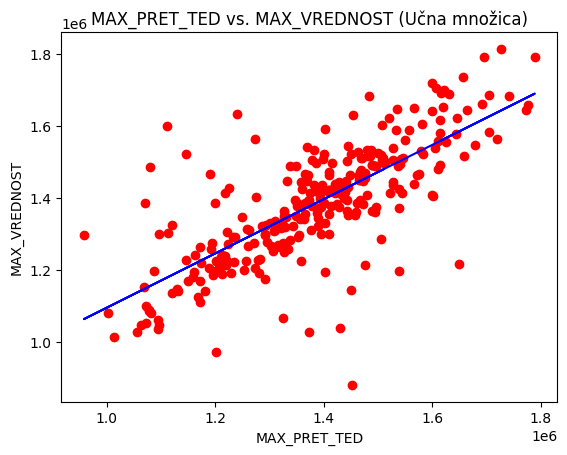

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='red');
plt.plot(X_train, regressor.predict(X_train), color = 'blue');
plt.title('MAX_PRET_TED vs. MAX_VREDNOST (Učna množica)');
plt.xlabel('MAX_PRET_TED');
plt.ylabel('MAX_VREDNOST');
plt.show();

Graf regresijske premice na testni množici

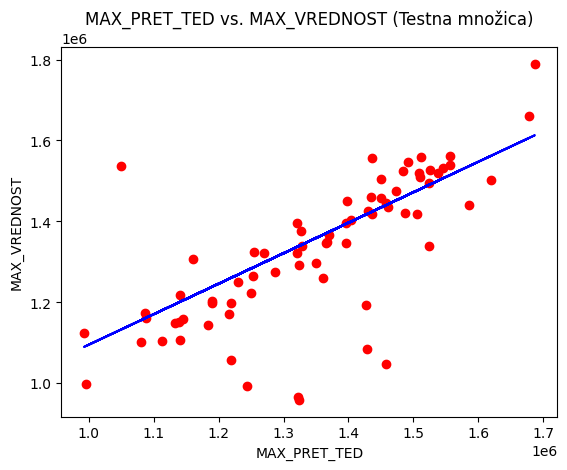

In [6]:
plt.scatter(X_test, y_test, color='red');
plt.plot(X_test, regressor.predict(X_test), color = 'blue');
plt.title('MAX_PRET_TED vs. MAX_VREDNOST (Testna množica)');
plt.xlabel('MAX_PRET_TED');
plt.ylabel('MAX_VREDNOST');
plt.show();

### Naloga 5
Linearna regresija vs. multipla linearna regresija

Multipla (večplastna) linearna regresija je vrsta linearne regresije, pri kateri imamo na vhodu več spremenljivk. Namesto ene same vhodne spremenljivke v primeru preproste linearne regresije imamo pri multipli linearni regresiji več vhodnih spremenljivk, zato jih predstavimo v obliki vektorja. Od tu naprej je postopek, z vidika razvijalca, praktično enak.

### Naloga 6
Izgradnja modela multipla linearne regresije in vrednotenje zgrajenega modela.

In [7]:
vhodni = df[['PRA_DAN', 'PRA_PRED', 'PRA_NASL', 'PRA', 'BDP1', 'BDP2', 'BDP3', 'URA_VEC', 'URA_MANJ',
             'MIN_VREDNOST', 'MIN_PRET_TED', 'MAX_PRET_TED', 'TEMP_MIN', 'TEMP_MAX', 'MIN_VRED_LM1',
             'MAX_VRED_LM1', 'PMIN_VRED_LM1', 'PMAX_VRED_LM1', 'RPMIN_VRED_LM1', 'RPMAX_VRED_LM1']];
izhodni = df['MAX_VREDNOST'];

n = min(vhodni.shape[0], izhodni.shape[0]);
vhodni_reshaped = vhodni[:n];
izhodni_reshaped = izhodni[:n];

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(vhodni_reshaped, izhodni_reshaped, test_size=0.2, random_state=0);

y_prediction = regressor.fit(x_train_m, y_train_m);
y_prediction = regressor.predict(x_test_m);

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_m, y_prediction));
r2 = regressor.score(x_test_m, y_test_m);
print(rmse);
print(r2);

40699.15720773117
0.9484111598833286


### Naloga 7
Izgradnja modela multiple linearne regresije po Bayesovem informacijskem kriteriju.

In [9]:
import statsmodels.api as sm

vhodni_reshaped = sm.add_constant(vhodni_reshaped);

# Kreiranje modela z vsemi spremenljivkami
model = sm.OLS(izhodni_reshaped, vhodni_reshaped).fit();

# Pridobivanje Bayesovega informacijskega kriterija
bic = model.bic;

# Backward elimination metoda
while True:
    # Pridobivanje spremenljivke z max p-vrednostjo
    max_pvalue = model.pvalues[1:].max();
    if max_pvalue > 0.05:
        var_to_remove = model.pvalues[1:].idxmax();
        vhodni_reshaped = vhodni_reshaped.drop(var_to_remove, axis=1);

        model = sm.OLS(izhodni_reshaped, vhodni_reshaped).fit();

        if model.bic < bic:
            bic = model.bic;
        else:
            break;
    else:
        break;

print(model.summary());

                            OLS Regression Results                            
Dep. Variable:           MAX_VREDNOST   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     886.7
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          2.05e-246
Time:                        09:18:51   Log-Likelihood:                -4226.2
No. Observations:                 359   AIC:                             8476.
Df Residuals:                     347   BIC:                             8523.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.815e+05   1.14e+05     -1.596

### Naloga 8
Ovrednotenje modela multiple linearne regresije

In [10]:
import numpy as np

# MAE - Mean Absolute Error
mae = np.mean(np.abs(y_prediction - y_test_m));

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test_m - y_prediction) / y_test_m)) * 100;

# SMAPE - Symetric Mean Absolute Percentage Error
smape = np.mean(2 * np.abs(y_test_m - y_prediction) / (np.abs(y_test_m) + np.abs(y_prediction))) * 100;

# RMSE - Root Mean Absolute Error
rmse = np.sqrt(np.mean((y_prediction - y_test_m)**2));

print("MAE:", mae);
print("MAPE:", mape);
print("SMAPE:", smape);
print("RMSE:", rmse);

MAE: 30461.902379222563
MAPE: 2.3847140700054985
SMAPE: 2.4079123364012585
RMSE: 40699.15720773117


### 9. naloga
Funkcija, ki prejme dataframe in dva stolpca kot parametre.

In [11]:
def calculate_errors(dataframe, actual_column, calculated_column):
    actual_vals = dataframe[actual_column];
    calculated_vals = dataframe[calculated_column];

    errors = [];

    mae = np.mean(np.abs(actual_vals - calculated_vals));
    errors.append(mae);

    mape = np.mean(np.abs((actual_vals - calculated_vals) / actual_vals)) * 100;
    errors.append(mape);

    smape = np.mean(2 * np.abs(actual_vals - calculated_vals) / (np.abs(actual_vals) + np.abs(calculated_vals))) * 100;
    errors.append(smape);

    rmse = np.sqrt(np.mean((actual_vals - calculated_vals)**2));
    errors.append(rmse);

    return errors;

errors = calculate_errors(df, 'MAX_PRET_TED', 'MAX_VREDNOST');
print(errors);

[74115.69651922004, 5.506104193516121, 5.510599416681853, 117841.00767761683]


### Naloga 10
Tukaj, da lahko določimo imena komponent, uporabimo namesto navadne liste, dictionary listo, ki ima ključ (ime) in vrednost za posamezno napako.

In [12]:
def calculate_errors(dataframe, actual_column, calculated_column):
    actual_vals = dataframe[actual_column];
    calculated_vals = dataframe[calculated_column];

    errors = {};

    errors['MAE'] = np.mean(np.abs(actual_vals - calculated_vals));

    errors['MAPE'] = np.mean(np.abs((actual_vals - calculated_vals) / actual_vals)) * 100;

    errors['SMAPE'] = np.mean(2 * np.abs(actual_vals - calculated_vals) / (np.abs(actual_vals) + np.abs(calculated_vals))) * 100;

    errors['RMSE'] = np.sqrt(np.mean((actual_vals - calculated_vals)**2));

    return errors;

errors = calculate_errors(df, 'MAX_PRET_TED', 'MAX_VREDNOST');
print(errors);

{'MAE': 74115.69651922004, 'MAPE': 5.506104193516121, 'SMAPE': 5.510599416681853, 'RMSE': 117841.00767761683}


### Naloga 11
Vrednosti napak iz prejšnje funkcije, ki imajo ustrezna imena, zapišemo v .csv datoteko Rezultat.

### Naloga 12
Izgradnja novega modela multiple linearne regresije tako, da podatke ločimo na učno
in testno obdobje (učno: januar-november; testno: december).

In [13]:
import datetime

train_data = df[df['DATUM'].dt.date < datetime.date(2012, 12, 1)];  # Train data includes dates before December 2012
test_data = df[df['DATUM'].dt.date >= datetime.date(2012, 12, 1)];  # Test data includes dates in December 2012

train_features, test_features, train_target, test_target = train_test_split(
    train_data[['PRA_DAN', 'PRA_PRED', 'PRA_NASL', 'PRA', 'BDP1', 'BDP2', 'BDP3', 'URA_VEC', 'URA_MANJ',
                 'MIN_VREDNOST', 'MIN_PRET_TED', 'MAX_PRET_TED', 'TEMP_MIN', 'TEMP_MAX', 'MIN_VRED_LM1',
                 'MAX_VRED_LM1', 'PMIN_VRED_LM1', 'PMAX_VRED_LM1', 'RPMIN_VRED_LM1', 'RPMAX_VRED_LM1']],
    train_data['MAX_VREDNOST'],
    test_size=0.2,
    random_state=42
)
print("Train set shape:", train_features.shape, train_target.shape);
print("Test set shape:", test_features.shape, test_target.shape);

model_train = sm.OLS(train_target, sm.add_constant(train_features)).fit();

test_features = sm.add_constant(test_features);
predicted_vals = model_train.predict(test_features);
print(predicted_vals);

Train set shape: (263, 20) (263,)
Test set shape: (66, 20) (66,)
9      1.563846e+06
164    1.450991e+06
139    1.462066e+06
46     1.600746e+06
94     1.266086e+06
           ...     
173    1.418807e+06
172    1.492621e+06
250    1.345178e+06
60     1.518459e+06
274    1.253246e+06
Length: 66, dtype: float64


In [14]:
train_target.reset_index(drop=True, inplace=True)

mae_train = np.mean(np.abs(train_target - predicted_vals))
mape_train = np.mean(np.abs((train_target - predicted_vals) / train_target)) * 100
smape_train = np.mean(2 * np.abs(train_target - predicted_vals) / (np.abs(train_target) + np.abs(predicted_vals))) * 100
rmse_train = np.sqrt(np.mean((predicted_vals - train_target)**2))

print("Train Set Metrics:")
print("MAE:", mae_train)
print("MAPE:", mape_train)
print("SMAPE:", smape_train)
print("RMSE:", rmse_train)

mae_test = np.mean(np.abs(predicted_vals - test_target))
mape_test = np.mean(np.abs((test_target - predicted_vals) / test_target)) * 100
smape_test = np.mean(2 * np.abs(test_target - predicted_vals) / (np.abs(test_target) + np.abs(predicted_vals))) * 100
rmse_test = np.sqrt(np.mean((predicted_vals - test_target)**2))

print("Test Set Metrics:")
print("MAE:", mae_test)
print("MAPE:", mape_test)
print("SMAPE:", smape_test)
print("RMSE:", rmse_test)

Train Set Metrics:
MAE: 180538.28120357753
MAPE: 14.061552218303142
SMAPE: 13.323815579875781
RMSE: 235629.99064989455
Test Set Metrics:
MAE: 27803.811791102693
MAPE: 2.0488165440868964
SMAPE: 2.0622539382609535
RMSE: 36613.95032268819


### Naloga 13
SVM model - Support Vector Machine

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_features_svm, test_features_svm, train_target_svm, test_target_svm = train_test_split(
    train_data[['PRA_DAN', 'PRA_PRED', 'PRA_NASL', 'PRA', 'BDP1', 'BDP2', 'BDP3', 'URA_VEC', 'URA_MANJ',
                 'MIN_VREDNOST', 'MIN_PRET_TED', 'MAX_PRET_TED', 'TEMP_MIN', 'TEMP_MAX', 'MIN_VRED_LM1',
                 'MAX_VRED_LM1', 'PMIN_VRED_LM1', 'PMAX_VRED_LM1', 'RPMIN_VRED_LM1', 'RPMAX_VRED_LM1']],
    train_data['MAX_VREDNOST'],
    test_size=0.2,
    random_state=42
)

# Create and train the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(train_features_svm, train_target_svm)

svm_train_predictions = svm_model.predict(train_features_svm)
svm_test_predictions = svm_model.predict(test_features_svm)

svm_train_mae = mean_absolute_error(train_target_svm, svm_train_predictions)
svm_train_rmse = mean_squared_error(train_target_svm, svm_train_predictions, squared=False)
svm_train_mape = np.mean(np.abs((train_target_svm - svm_train_predictions) / train_target_svm)) * 100
svm_train_smape = np.mean(2 * np.abs(train_target_svm - svm_train_predictions) / (np.abs(train_target_svm) + np.abs(svm_train_predictions))) * 100

svm_test_mae = mean_absolute_error(test_target_svm, svm_test_predictions)
svm_test_rmse = mean_squared_error(test_target_svm, svm_test_predictions, squared=False)
svm_test_mape = np.mean(np.abs((test_target_svm - svm_test_predictions) / test_target_svm)) * 100
svm_test_smape = np.mean(2 * np.abs(test_target_svm - svm_test_predictions) / (np.abs(test_target_svm) + np.abs(svm_test_predictions))) * 100

print("SVM Train MAE:", svm_train_mae)
print("SVM Train RMSE:", svm_train_rmse)
print("SVM Train MAPE:", svm_train_mape)
print("SVM Train SMAPE:", svm_train_smape)

print("SVM Test MAE:", svm_test_mae)
print("SVM Test RMSE:", svm_test_rmse)
print("SVM Test MAPE:", svm_test_mape)
print("SVM Test SMAPE:", svm_test_smape);

SVM Train MAE: 1180704.1950709268
SVM Train RMSE: 1566235.1156004756
SVM Train MAPE: 90.0665705934266
SVM Train SMAPE: 70.63091036196157
SVM Test MAE: 1138083.7781040855
SVM Test RMSE: 1607494.790755024
SVM Test MAPE: 84.17051696334266
SVM Test SMAPE: 62.41674089440396


MAE: Nižje vrednosti kažejo na boljšo uspešnost. Pri primerjavi vrednosti MAE ima model linearne regresije nižjo vrednost tako za učno množico (180.538) kot za testno množico (27.804). Zato model linearne regresije dosega boljše rezultate glede na MAE.

MAPE: Nižje vrednosti kažejo na boljšo uspešnost. Model linearne regresije ima nižji MAPE tako za učno množico (14,06 %) kot za testno množico (2,05 %). Torej model linearne regresije dosega boljše rezultate tudi glede na MAPE.

SMAPE: Nižje vrednosti kažejo na boljšo uspešnost. Model linearne regresije ima nižji SMAPE tako za učno množico (13,32 %) kot za testno množico (2,06 %). Ponovno model linearne regresije dosega boljše rezultate tudi glede na SMAPE.

RMSE: Nižje vrednosti kažejo na boljšo uspešnost. Model linearne regresije ima nižjo RMSE tako za učno množico (235.630) kot za testno množico (36.614). Torej model linearne regresije dosega boljše rezultate tudi glede na RMSE.

Na podlagi teh metrik lahko sklepamo, da model linearne regresije dosega boljše rezultate kot model SVM glede na MAE, MAPE, SMAPE in RMSE tako za učno množico kot za testno množico. Model linearne regresije ima nižje napake in boljše prileganje podatkom v primerjavi z modelom SVM v tem konkretnem primeru.

### Naloga 14
Kako zamik učnega obdobja vpliva na MAPE napako modela.

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
# Pretvorba 'DATUM' stolpca v format datetime
df['DATUM'] = pd.to_datetime(df['DATUM'])

# Definiranje začetka in konca učnega in testnega obdobja
training_start = pd.to_datetime('2012-01-07')
training_end = pd.to_datetime('2012-11-05')
testing_start = pd.to_datetime('2012-12-01')
testing_end = pd.to_datetime('2012-12-31')

# Funkcija za izračun MAPE napake
def calculate_mape(training_start, training_end, testing_start, testing_end):
    # Filtriramo podatke glede na definirane datume
    train_data = df[(df['DATUM'] >= training_start) & (df['DATUM'] <= training_end)]
    test_data = df[(df['DATUM'] >= testing_start) & (df['DATUM'] <= testing_end)]

    # Razdelimo podatke na učno in testno množico
    train_features = train_data[['PRA_DAN', 'PRA_PRED', 'PRA_NASL', 'PRA', 'BDP1', 'BDP2', 'BDP3', 'URA_VEC', 'URA_MANJ',
                          'MIN_VREDNOST', 'MIN_PRET_TED', 'MAX_PRET_TED', 'TEMP_MIN', 'TEMP_MAX', 'MIN_VRED_LM1',
                          'MAX_VRED_LM1', 'PMIN_VRED_LM1', 'PMAX_VRED_LM1', 'RPMIN_VRED_LM1', 'RPMAX_VRED_LM1']]
    train_target = train_data['MAX_VREDNOST']
    test_features = test_data[['PRA_DAN', 'PRA_PRED', 'PRA_NASL', 'PRA', 'BDP1', 'BDP2', 'BDP3', 'URA_VEC', 'URA_MANJ',
                        'MIN_VREDNOST', 'MIN_PRET_TED', 'MAX_PRET_TED', 'TEMP_MIN', 'TEMP_MAX', 'MIN_VRED_LM1',
                        'MAX_VRED_LM1', 'PMIN_VRED_LM1', 'PMAX_VRED_LM1', 'RPMIN_VRED_LM1', 'RPMAX_VRED_LM1']]
    test_target = test_data['MAX_VREDNOST']

    # Treniramo model
    model = LinearRegression()
    model.fit(train_features, train_target)

    # Naredimo napoved
    target_pred = model.predict(test_features)

    # Izračunamo MAPE napako
    mape = mean_absolute_percentage_error(test_target, target_pred)

    return mape

# Definiramo meje učnega obdobja
training_period_start = pd.to_datetime('2012-02-01')
training_period_end = pd.to_datetime('2012-11-30')

# Zmanjšujemo učno obdobje za en dan in izračunamo MAPE napako
for i in range((training_period_end - training_period_start).days + 1):
    current_training_start = training_period_start - pd.DateOffset(days=i)
    current_training_end = training_period_end - pd.DateOffset(days=i)

    # Izračunamo MAPE napako za trenutno učno obdobje
    mape = calculate_mape(current_training_start, current_training_end, testing_start, testing_end)

    # Shranimo MAPE napako
    print(f"MAPE with training period from {current_training_start} to {current_training_end}: {mape}")

MAPE with training period from 2012-02-01 00:00:00 to 2012-11-30 00:00:00: 0.01629700396368567
MAPE with training period from 2012-01-31 00:00:00 to 2012-11-29 00:00:00: 0.016368250633486955
MAPE with training period from 2012-01-30 00:00:00 to 2012-11-28 00:00:00: 0.016502067181285
MAPE with training period from 2012-01-29 00:00:00 to 2012-11-27 00:00:00: 0.016477787474120497
MAPE with training period from 2012-01-28 00:00:00 to 2012-11-26 00:00:00: 0.01620156814551751
MAPE with training period from 2012-01-27 00:00:00 to 2012-11-25 00:00:00: 0.01612989360020708
MAPE with training period from 2012-01-26 00:00:00 to 2012-11-24 00:00:00: 0.016105104507167147
MAPE with training period from 2012-01-25 00:00:00 to 2012-11-23 00:00:00: 0.016077435347198906
MAPE with training period from 2012-01-24 00:00:00 to 2012-11-22 00:00:00: 0.015963218692525625
MAPE with training period from 2012-01-23 00:00:00 to 2012-11-21 00:00:00: 0.015960142947402247
MAPE with training period from 2012-01-22 00:0

### Naloga 15
JSON (JavaScript Object Notation) je format za izmenjavo podatkov, ki se pogosto uporablja za shranjevanje in prenos strukturiranih podatkov med različnimi aplikacijami. V Pythonu lahko podatke v formatu JSON preberete in ustvarite s pomočjo vgrajene knjižnice json.

Za branje JSON podatkov iz datoteke v Pythonu uporabimo funkcijo json.load(). Ta funkcija bo prebrala JSON datoteko in pretvorila podatke v ustrezen Pythonov objekt.

Za ustvarjanje JSON podatkov v Pythonu uporabimo funkcijo json.dump(). Ta funkcija pretvori Pythonov objekt v JSON format in ga zapiše v datoteko. Primer:

### Naloga 16
Iz .xlsx datoteke iz 2. naloge izpišite .json datoteko.

In [16]:
import json

df['DATUM'] = pd.to_datetime(df['DATUM'])
df['DATUM'] = df['DATUM'].dt.strftime('%Y-%m-%d %H:%M:%S')
data = df.to_dict(orient='records')

with open('one_line_data.json', 'w') as file:
    json.dump(data, file);

### Naloga 17
Branje json datoteke in pretvorba v excel fajl.

In [17]:
data = pd.read_json('one_line_data.json')
data.to_excel('one_line_data.xlsx', index=False)
print("one_line_data.xlsx file has been created.")

one_line_data.xlsx file has been created.


### Naloga 18 in 19
Unit test funkcija se nahaja v main.py fajlu.
Originalna in konvertovana excel datoteka se razlikujejo. Možno je, da so te razlike posledica postopka pretvorbe ali samih podatkov.